## Урок 2. Keras. Домашнее задание

In [1]:
# чтобы не ругался на GPU
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [2]:
# скрываем warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mnist
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

In [4]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [5]:
# Normalize the images.
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

In [6]:
# Flatten the images.
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

In [7]:
# Build the model.
model = Sequential([
  Dense(64, activation='relu', input_shape=(784,)),
  Dense(64, activation='relu'),
  Dense(10, activation='softmax'),
])


In [8]:
# Compile the model.
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 55050 (215.04 KB)
Trainable params: 55050 (215.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
# Train the model.
history = model.fit(
  train_images,
  to_categorical(train_labels),
  epochs=5,
  batch_size=32,)
print("Обучение завершено")

Epoch 1/5
1875/1875 [==============================] - 20s 9ms/step - loss: 0.3582 - accuracy: 0.8939
Epoch 2/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1822 - accuracy: 0.9441
Epoch 3/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1382 - accuracy: 0.9566
Epoch 4/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1152 - accuracy: 0.9635
Epoch 5/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0993 - accuracy: 0.9688
Обучение завершено


In [11]:
# Evaluate the model.
loss,metrics = model.evaluate(test_images, to_categorical(test_labels))
print(f'Loss - {np.round(loss,2)}, Accuracy - {np.round(metrics,2)}')

313/313 [==============================] - 3s 7ms/step - loss: 0.1226 - accuracy: 0.9620
Loss - 0.12, Accuracy - 0.96


### Задание_1:
Попробуйте обучить, нейронную сеть на Keras (рассмотренную на уроке) на датасете MNIST с другими параметрами.

### Модель_2. 
#### Изменения в количестве и качестве слоёв, увеличение количества эпох и обучающих примеров

In [12]:
# Build the model_2.
model_2 = Sequential([
    Dense(512, activation='relu', input_shape=(784,)),
    Dense(256, activation='tanh'), # Скрытый слой с активацией tanh
    Dense(128, activation='tanh'), # Скрытый слой с активацией tanh
    Dense(10, activation='softmax'),# выходной слой из 10 нейронов (сколько классов, столько нейронов) + активация softmax
  ])

In [13]:
# Compile the model.
model_2.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [14]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 512)               401920    
                                                                 
 dense_4 (Dense)             (None, 256)               131328    
                                                                 
 dense_5 (Dense)             (None, 128)               32896     
                                                                 
 dense_6 (Dense)             (None, 10)                1290      
                                                                 
Total params: 567434 (2.16 MB)
Trainable params: 567434 (2.16 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
# Train the model.
history_2 = model_2.fit(
  train_images,
  to_categorical(train_labels),
  epochs=10,
  batch_size=64,)
print("Обучение завершено")

Epoch 1/10
938/938 [==============================] - 34s 33ms/step - loss: 0.2727 - accuracy: 0.9154
Epoch 2/10
938/938 [==============================] - 32s 34ms/step - loss: 0.1318 - accuracy: 0.9592
Epoch 3/10
938/938 [==============================] - 32s 34ms/step - loss: 0.1027 - accuracy: 0.9675
Epoch 4/10
938/938 [==============================] - 32s 34ms/step - loss: 0.0833 - accuracy: 0.9737
Epoch 5/10
938/938 [==============================] - 33s 35ms/step - loss: 0.0720 - accuracy: 0.9765
Epoch 6/10
938/938 [==============================] - 32s 34ms/step - loss: 0.0638 - accuracy: 0.9794
Epoch 7/10
938/938 [==============================] - 32s 34ms/step - loss: 0.0546 - accuracy: 0.9819
Epoch 8/10
938/938 [==============================] - 32s 35ms/step - loss: 0.0510 - accuracy: 0.9833
Epoch 9/10
938/938 [==============================] - 32s 34ms/step - loss: 0.0460 - accuracy: 0.9848
Epoch 10/10
938/938 [==============================] - 32s 34ms/step - loss: 0.041

In [16]:
# Evaluate the model_2.
loss,metrics = model_2.evaluate(test_images, to_categorical(test_labels))
print(f'Loss - {np.round(loss,2)}, Accuracy - {np.round(metrics,2)}')

313/313 [==============================] - 4s 11ms/step - loss: 0.0969 - accuracy: 0.9713
Loss - 0.1, Accuracy - 0.97


### Модель_3. 
#### Вернём только параметры слоёв начальной модели.

In [17]:
# Build the model.
model_3 = Sequential([
  Dense(64, activation='relu', input_shape=(784,)),
  Dense(64, activation='relu'),
  Dense(10, activation='softmax'),
])

In [18]:
# Compile the model.
model_3.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [19]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 64)                50240     
                                                                 
 dense_8 (Dense)             (None, 64)                4160      
                                                                 
 dense_9 (Dense)             (None, 10)                650       
                                                                 
Total params: 55050 (215.04 KB)
Trainable params: 55050 (215.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
# Train the model.
history_3 = model_3.fit(
  train_images,
  to_categorical(train_labels),
  epochs=10,
  batch_size=64,)
print("Обучение завершено")

Epoch 1/10
938/938 [==============================] - 14s 12ms/step - loss: 0.4098 - accuracy: 0.8801
Epoch 2/10
938/938 [==============================] - 10s 11ms/step - loss: 0.2121 - accuracy: 0.9367
Epoch 3/10
938/938 [==============================] - 10s 11ms/step - loss: 0.1634 - accuracy: 0.9508
Epoch 4/10
938/938 [==============================] - 10s 10ms/step - loss: 0.1334 - accuracy: 0.9595
Epoch 5/10
938/938 [==============================] - 9s 10ms/step - loss: 0.1171 - accuracy: 0.9642
Epoch 6/10
938/938 [==============================] - 10s 11ms/step - loss: 0.1055 - accuracy: 0.9676
Epoch 7/10
938/938 [==============================] - 11s 11ms/step - loss: 0.0958 - accuracy: 0.9696
Epoch 8/10
938/938 [==============================] - 12s 13ms/step - loss: 0.0876 - accuracy: 0.9722
Epoch 9/10
938/938 [==============================] - 12s 12ms/step - loss: 0.0793 - accuracy: 0.9752
Epoch 10/10
938/938 [==============================] - 9s 10ms/step - loss: 0.0716 

In [21]:
# Evaluate the model_3.
loss,metrics = model_3.evaluate(test_images, to_categorical(test_labels))
print(f'Loss - {np.round(loss,2)}, Accuracy - {np.round(metrics,2)}')

313/313 [==============================] - 3s 7ms/step - loss: 0.1003 - accuracy: 0.9701
Loss - 0.1, Accuracy - 0.97


### Модель_4. 
#### Слои модели_2 при параметрах fit начальной модели

In [22]:
# Build the model_4.
model_4 = Sequential([
    Dense(512, activation='relu', input_shape=(784,)),
    Dense(256, activation='tanh'), # Скрытый слой с активацией tanh
    Dense(128, activation='tanh'), # Скрытый слой с активацией tanh
    Dense(10, activation='softmax'),# выходной слой из 10 нейронов (сколько классов, столько нейронов) + активация softmax
  ])

In [23]:
# Compile the model.
model_4.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [24]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 512)               401920    
                                                                 
 dense_11 (Dense)            (None, 256)               131328    
                                                                 
 dense_12 (Dense)            (None, 128)               32896     
                                                                 
 dense_13 (Dense)            (None, 10)                1290      
                                                                 
Total params: 567434 (2.16 MB)
Trainable params: 567434 (2.16 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
# Train the model.
history_4 = model_4.fit(
  train_images,
  to_categorical(train_labels),
  epochs=5,
  batch_size=32,)
print("Обучение завершено")

Epoch 1/5
1875/1875 [==============================] - 65s 33ms/step - loss: 0.2718 - accuracy: 0.9150
Epoch 2/5
1875/1875 [==============================] - 59s 32ms/step - loss: 0.1388 - accuracy: 0.9563
Epoch 3/5
1875/1875 [==============================] - 58s 31ms/step - loss: 0.1107 - accuracy: 0.9664
Epoch 4/5
1875/1875 [==============================] - 59s 31ms/step - loss: 0.0921 - accuracy: 0.9712
Epoch 5/5
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0799 - accuracy: 0.9749
Обучение завершено


In [26]:
# Evaluate the model_3.
loss,metrics = model_4.evaluate(test_images, to_categorical(test_labels))
print(f'Loss - {np.round(loss,2)}, Accuracy - {np.round(metrics,2)}')

313/313 [==============================] - 4s 11ms/step - loss: 0.0985 - accuracy: 0.9697
Loss - 0.1, Accuracy - 0.97


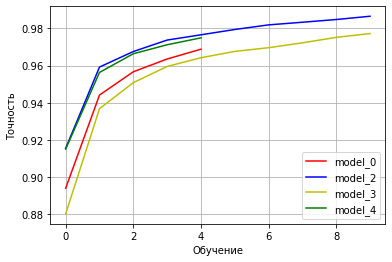

In [27]:
plt.plot(history.history['accuracy'], label="model_0",color = 'r')
plt.plot(history_2.history['accuracy'], label="model_2", color = 'b')
plt.plot(history_3.history['accuracy'], label="model_3", color = 'y')
plt.plot(history_4.history['accuracy'], label="model_4", color = 'g')
plt.xlabel('Обучение')
plt.ylabel('Точность')
plt.grid(True)
plt.legend()
plt.show()

### Модель_2 лучшая. Далее попробуем на ней разные оптимизаторы:

In [28]:
# Build the model_5.
model_5 = Sequential([
    Dense(512, activation='relu', input_shape=(784,)),
    Dense(256, activation='tanh'), # Скрытый слой с активацией tanh
    Dense(128, activation='tanh'), # Скрытый слой с активацией tanh
    Dense(10, activation='softmax'),# выходной слой из 10 нейронов (сколько классов, столько нейронов) + активация softmax
  ])

In [29]:
# Compile the model.
model_5.compile(
  optimizer='sgd',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [30]:
# Train the model.
history_5 = model_5.fit(
  train_images,
  to_categorical(train_labels),
  epochs=10,
  batch_size=64,)
print("Обучение завершено")

Epoch 1/10
938/938 [==============================] - 24s 24ms/step - loss: 0.6270 - accuracy: 0.8448
Epoch 2/10
938/938 [==============================] - 24s 26ms/step - loss: 0.3157 - accuracy: 0.9106
Epoch 3/10
938/938 [==============================] - 23s 25ms/step - loss: 0.2642 - accuracy: 0.9237
Epoch 4/10
938/938 [==============================] - 23s 24ms/step - loss: 0.2304 - accuracy: 0.9334
Epoch 5/10
938/938 [==============================] - 23s 25ms/step - loss: 0.2045 - accuracy: 0.9411
Epoch 6/10
938/938 [==============================] - 24s 26ms/step - loss: 0.1829 - accuracy: 0.9473
Epoch 7/10
938/938 [==============================] - 22s 24ms/step - loss: 0.1650 - accuracy: 0.9528
Epoch 8/10
938/938 [==============================] - 26s 28ms/step - loss: 0.1501 - accuracy: 0.9570
Epoch 9/10
938/938 [==============================] - 35s 37ms/step - loss: 0.1369 - accuracy: 0.9607
Epoch 10/10
938/938 [==============================] - 35s 38ms/step - loss: 0.125

In [31]:
# Evaluate the model_5.
loss,metrics = model_5.evaluate(test_images, to_categorical(test_labels))
print(f'Loss - {np.round(loss,2)}, Accuracy - {np.round(metrics,2)}')

313/313 [==============================] - 9s 22ms/step - loss: 0.1352 - accuracy: 0.9612
Loss - 0.14, Accuracy - 0.96


In [32]:
# Build the model_6.
model_6 = Sequential([
    Dense(512, activation='relu', input_shape=(784,)),
    Dense(256, activation='tanh'), # Скрытый слой с активацией tanh
    Dense(128, activation='tanh'), # Скрытый слой с активацией tanh
    Dense(10, activation='softmax'),# выходной слой из 10 нейронов (сколько классов, столько нейронов) + активация softmax
  ])

In [33]:
# Compile the model.
model_6.compile(
  optimizer='RMSprop',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [34]:
# Train the model.
history_6 = model_6.fit(
  train_images,
  to_categorical(train_labels),
  epochs=10,
  batch_size=64,)
print("Обучение завершено")

Epoch 1/10
938/938 [==============================] - 48s 45ms/step - loss: 0.3378 - accuracy: 0.8940
Epoch 2/10
938/938 [==============================] - 35s 38ms/step - loss: 0.1440 - accuracy: 0.9550
Epoch 3/10
938/938 [==============================] - 32s 35ms/step - loss: 0.1059 - accuracy: 0.9658
Epoch 4/10
938/938 [==============================] - 37s 39ms/step - loss: 0.0850 - accuracy: 0.9740
Epoch 5/10
938/938 [==============================] - 37s 40ms/step - loss: 0.0691 - accuracy: 0.9784
Epoch 6/10
938/938 [==============================] - 28s 30ms/step - loss: 0.0599 - accuracy: 0.9813
Epoch 7/10
938/938 [==============================] - 27s 29ms/step - loss: 0.0513 - accuracy: 0.9840
Epoch 8/10
938/938 [==============================] - 30s 32ms/step - loss: 0.0441 - accuracy: 0.9857
Epoch 9/10
938/938 [==============================] - 34s 36ms/step - loss: 0.0404 - accuracy: 0.9870
Epoch 10/10
938/938 [==============================] - 34s 37ms/step - loss: 0.034

### Задание_2:
Какого результата вы добились от нейросети?

In [35]:
# Evaluate the model_6.
loss,metrics = model_6.evaluate(test_images, to_categorical(test_labels))
print(f'Loss - {np.round(loss,2)}, Accuracy - {np.round(metrics,2)}')

313/313 [==============================] - 6s 15ms/step - loss: 0.0716 - accuracy: 0.9804
Loss - 0.07, Accuracy - 0.98


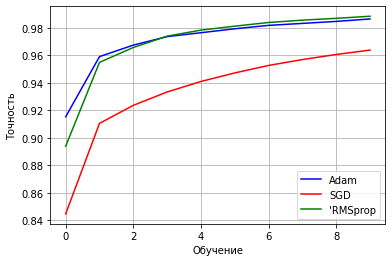

In [36]:
plt.plot(history_2.history['accuracy'], label="Adam", color = 'blue')
plt.plot(history_5.history['accuracy'], label="SGD", color = 'red')
plt.plot(history_6.history['accuracy'], label="'RMSprop", color = 'green')
plt.xlabel('Обучение')
plt.ylabel('Точность')
plt.grid(True)
plt.legend()
plt.show()

### Задание_3:
Что помогло вам улучшить её точность?

**Изменения в количестве и качестве слоёв, увеличение количества эпох, обучающих примеров, выбор оптимизатора**

### 
### Задание_4:

Поработайте с документацией Keras. Попробуйте найти полезные команды Keras, неразобранные на уроке.

4.1. Из метода evaluate получены параметры для оценки ошибки и точности тестовых данных.

4.2. EarlyStopping позволяет закончить обучение если результаты больше не улучшаются.

4.3. predict_classes позволяет срузу получить метки классов

4.4. backend.tensorflow_backend._get_available_gpus позволяет увидеть доступные видеокарты